# Time Series

In [1]:
import matplotlib as mpl
import seaborn as sns
import numpy as np
import investpy

np.random.seed(0)

## Manipulação de Datas e Horários

In [2]:
## Timestamp no pandas
import pandas as pd

date = pd.to_datetime("18th of November, 2000")
date

Timestamp('2000-11-18 00:00:00')

In [3]:
## Formatação - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
date.strftime('%A')

'Saturday'

In [4]:
## DatetimeIndex
index = pd.DatetimeIndex(['2013-11-18', '2014-11-18',
                          '2015-11-18', '2016-11-18'])
index

DatetimeIndex(['2013-11-18', '2014-11-18', '2015-11-18', '2016-11-18'], dtype='datetime64[ns]', freq=None)

In [5]:
## Slice DatetimeIndex
index[index.slice_indexer("2013", "2014")]

DatetimeIndex(['2013-11-18', '2014-11-18'], dtype='datetime64[ns]', freq=None)

In [6]:
# Slice Dataframe com DatetimeIndex
data = pd.Series([0, 10, 20, 30], index=index)
data['2013':'2015']

2013-11-18     0
2014-11-18    10
2015-11-18    20
dtype: int64

In [7]:
## date_range retorna um DatetimeIndex
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [8]:
## date_range com frequencia
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [9]:
## Convertendo Dateframe para DatetimeIndex
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [10]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

## Dataset indexado com DatetimeIndex

In [11]:
import matplotlib.pyplot as plt
from pandas_datareader import data
import seaborn
seaborn.set()

In [12]:
goog = data.DataReader('GOOG', 
                       start='2004', 
                       end='2021',
                       data_source='yahoo')
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800.0,1738.849976
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1393000.0,1776.089966
2020-12-29,1792.439941,1756.089966,1787.790039,1758.719971,1299400.0,1758.719971
2020-12-30,1765.094971,1725.599976,1762.010010,1739.520020,1306100.0,1739.520020
2020-12-31,1758.930054,1735.420044,1735.420044,1751.880005,1011900.0,1751.880005


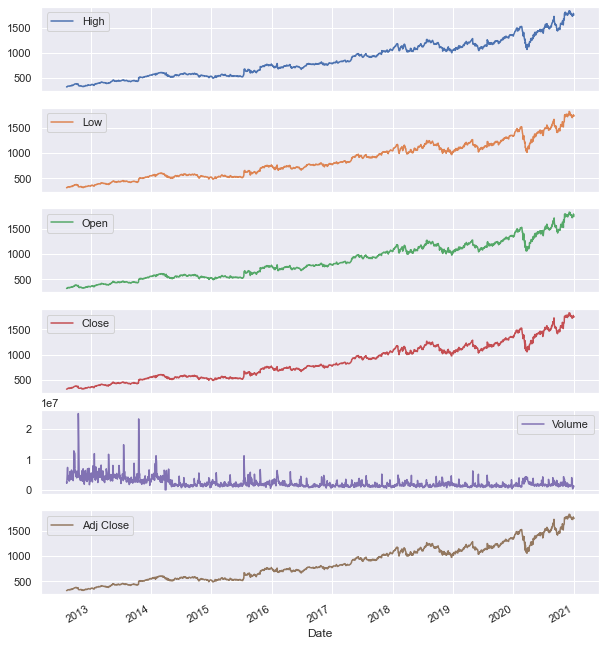

In [13]:
## Mostrando os preços ao longo do tempo
goog[2008:].plot(subplots=True, figsize=(10,12))
plt.show();

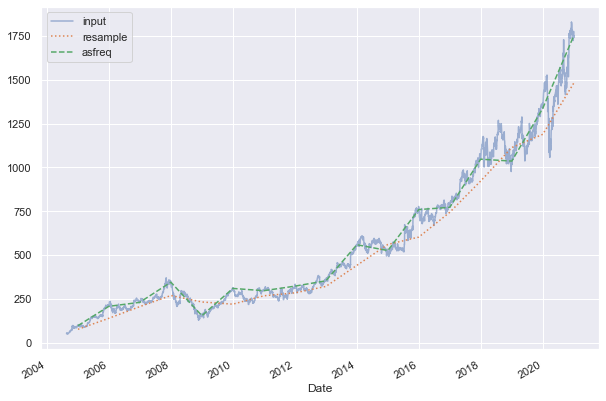

In [14]:
## Resampling
### Downsampling
goog['Close'].plot(alpha=0.5, style='-', figsize=(10,7))
goog['Close'].resample('BA').mean().plot(style=':') ## Data aggregation
goog['Close'].asfreq('BA').plot(style='--'); ## Data selection
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

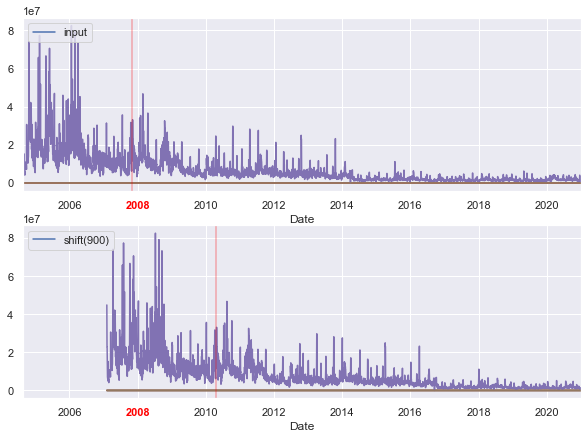

In [15]:
## Shifting

fig, ax = plt.subplots(2, sharey=True, figsize=(10,7))

# aplicando a frequência para os dados 
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])

# legendas e anotações
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

## Windowing

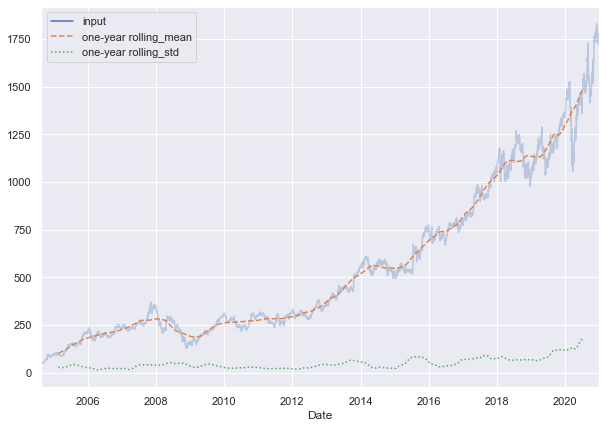

In [16]:
## Centra o agrupamento de um ano em certa data (One Year Centered)
rolling = goog['Close'].rolling(365, center=True)

data = pd.DataFrame({'input': goog['Close'], 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'], figsize=(10,7))
ax.lines[0].set_alpha(0.3)

## Quant Basics

## Importação dos dados

In [17]:
df = investpy.stocks.get_stock_historical_data(stock = 'PETR4', country='brazil', from_date = '01/01/2015', to_date = '31/12/2022')
df.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2022-01-20,31.50,32.00,31.11,31.72,85353104,BRL
2022-01-21,31.57,31.88,31.53,31.77,60384100,BRL
2022-01-24,31.69,32.25,31.04,31.95,79117104,BRL
2022-01-25,31.70,33.23,31.58,32.99,98358496,BRL
2022-01-26,33.30,34.25,33.30,34.13,70859400,BRL


## Retorno

In [18]:
## Simples
df['Rt'] = df['Close'].pct_change() ## percentual
df['rt'] = np.log(df['Close']/df['Close'].shift(1)) ## logaritmo
## Cumulativo
df['Rtcum'] = (df['Rt']+1).cumprod() - 1
df['rtcum'] = df['rt'].cumsum()
df.tail()
## r = ln(R + 1)

,Open,High,Low,Close,Volume,Currency,Rt,rt,Rtcum,rtcum
Date,,,,,,,,,,
2022-01-20,31.50,32.00,31.11,31.72,85353104,BRL,0.007304,0.007277,2.532294,1.261948
2022-01-21,31.57,31.88,31.53,31.77,60384100,BRL,0.001576,0.001575,2.537862,1.263523
2022-01-24,31.69,32.25,31.04,31.95,79117104,BRL,0.005666,0.005650,2.557906,1.269172
2022-01-25,31.70,33.23,31.58,32.99,98358496,BRL,0.032551,0.032032,2.673719,1.301205
2022-01-26,33.30,34.25,33.30,34.13,70859400,BRL,0.034556,0.033972,2.800668,1.335177


## Risco

In [19]:
df['rt'].std() ## desvio em todo o tempo

0.033360502990273024

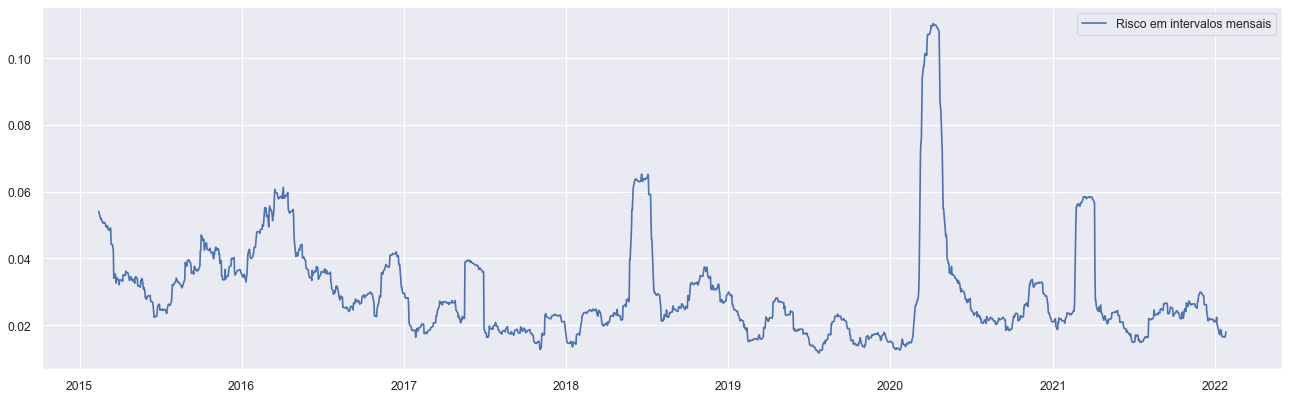

In [20]:
# desvio centrado com intervalo de 1 mês
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(df['rt'].rolling(30).std(),label='Risco em intervalos mensais')
plt.legend()

In [21]:
## EWMA (Desvio Padrão exponencial móvel)
## https://www.investopedia.com/articles/07/ewma.asp
## http://wilsonfreitas.github.io/posts/estimando-ewma-na-pratica.html
def EWMA(ret,alpha):
    n = len(ret)
    ewma = np.zeros(n)
    sqrtret = ret**2
    ewma[1] = sqrtret[1]
    for i in range(2,n):
        ewma[i] = alpha*ewma[i-1] + (1-alpha)*sqrtret[i-1]
    return ewma

In [22]:
df['EWMA'] = EWMA(df['rt'],0.97)

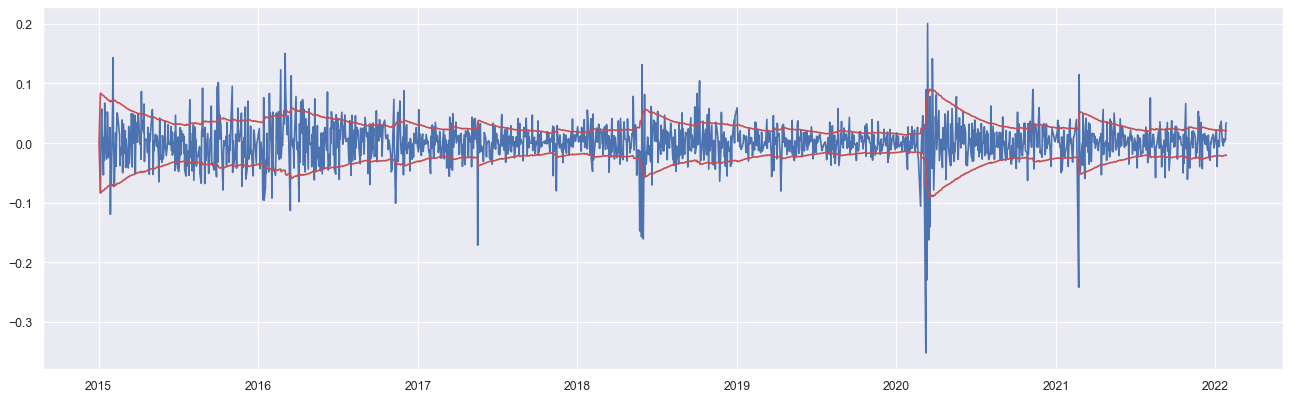

In [23]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(df['rt'])
plt.plot(np.sqrt(df['EWMA']), color = 'r')
plt.plot(-np.sqrt(df['EWMA']), color = 'r')

In [24]:
## Numero de Parkinson
length = len(df['High'])
logHi_Lo = np.log(df['High']/df['Low'])**2
parkinson = np.sqrt(logHi_Lo.rolling(30).sum()/(4*length*np.log(2)))

In [25]:
## German-Klass
Hi_Lo = (np.log(df['High']/df['Low'])**2)/2
Cl_Op = (np.log(df['Close']/df['Open'])**2)*(2*np.log(2) - 1)
aux = Hi_Lo - Cl_Op
GK = np.sqrt(aux.rolling(30).sum()/length)

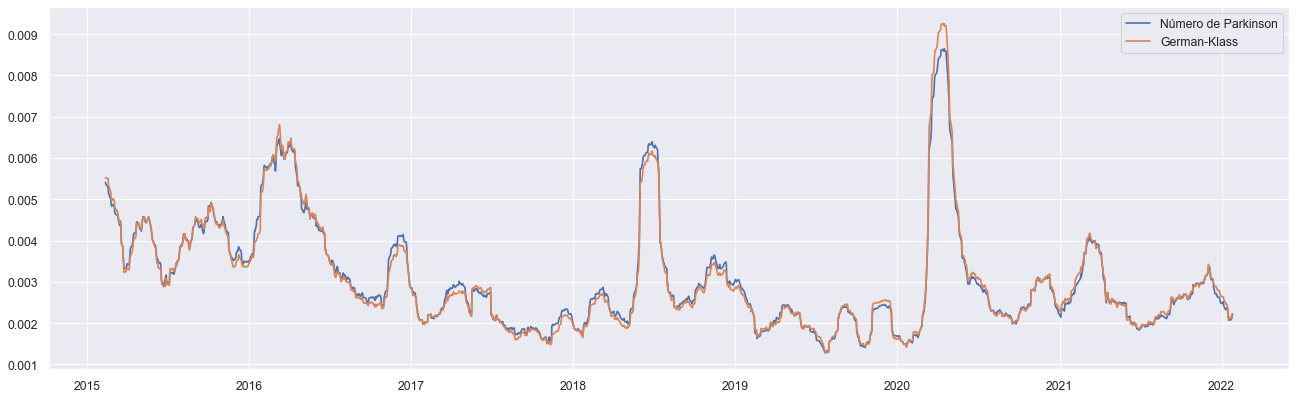

In [26]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(parkinson, label = 'Número de Parkinson')
plt.plot(GK, label = 'German-Klass')
plt.legend()

## Lidando com Portifolios

In [27]:
tickers = ['PETR3','VALE3','WEGE3','ELET3']
df = pd.DataFrame()
for t in tickers:
    df[t] = investpy.stocks.get_stock_historical_data(stock = t, country='brazil', from_date = '01/01/2015', to_date = '01/01/2022')['Close']
ibov = investpy.indices.get_index_historical_data(index = 'Bovespa', country='brazil', from_date = '01/01/2015', to_date = '01/01/2022')['Close']
df['ibov'] = ibov

### Retorno

In [28]:
weights = [0.3,0.2,0.2,0.3]
R = np.dot(df[tickers].pct_change(), weights)
dfcomp = (pd.DataFrame(R, columns = ['R'],index = ibov.index).join(df['ibov'].pct_change())+1).cumprod() - 1

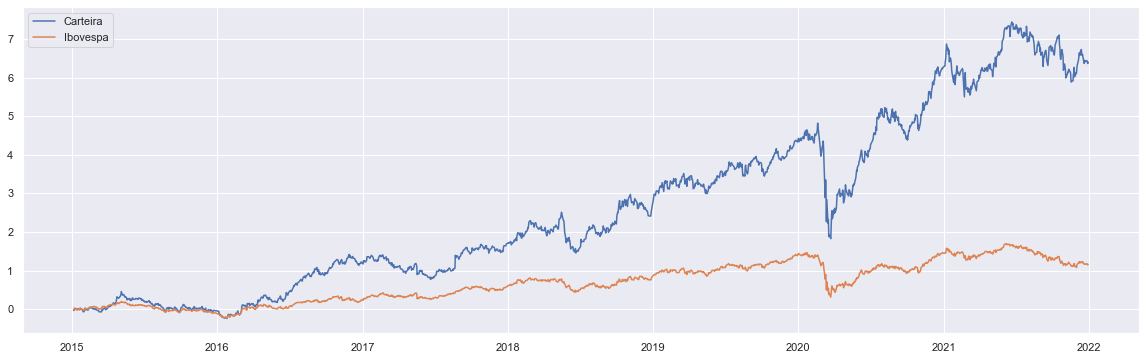

In [29]:
plt.figure(figsize=(20, 6))
plt.plot(dfcomp)
plt.legend(['Carteira','Ibovespa'])

### Risco

<AxesSubplot:>

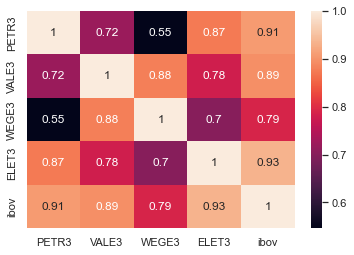

In [30]:
sns.heatmap(df.corr(), annot = True)

In [31]:
# ['PETR3','VALE3','WEGE3','ELET3']
w = np.array([0.25,0.25,0.25,0.25])
log_ret = np.log(df[tickers]/df[tickers].shift(1))
vol = np.sqrt(np.dot(w, np.dot(log_ret.cov()*252, w.T)))
print(f"A volatilidade anual é de {vol*100}% para os pesos {w}")
# Segundo Portifolio
w = np.array([0.3,0.3,0.2,0.2])
log_ret = np.log(df[tickers]/df[tickers].shift(1))
vol = np.sqrt(np.dot(w, np.dot(log_ret.cov()*252, w.T)))
print(f"A volatilidade anual é de {vol*100}% para os pesos {w}")
# Terceiro Portifolio
w = np.array([0.4,0.1,0.1,0.4])
log_ret = np.log(df[tickers]/df[tickers].shift(1))
vol = np.sqrt(np.dot(w, np.dot(log_ret.cov()*252, w.T)))
print(f"A volatilidade anual é de {vol*100}% para os pesos {w}")

A volatilidade anual é de 35.231560104434436% para os pesos [0.25 0.25 0.25 0.25]
A volatilidade anual é de 36.17030117189891% para os pesos [0.3 0.3 0.2 0.2]
A volatilidade anual é de 41.545150948408796% para os pesos [0.4 0.1 0.1 0.4]


## Markowitz

In [32]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df_close.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df_close.columns),)
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

In [33]:
wallets = generate_wallets(df[tickers])
w = best_portfolio(wallets)
w

array([0.01403185, 0.25896026, 0.55009043, 0.17691746])

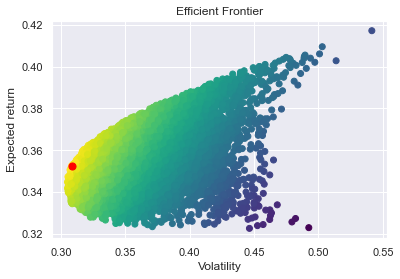

In [34]:
plot_efficient_frontier(wallets)

In [35]:
df.head()

,PETR3,VALE3,WEGE3,ELET3,ibov
Date,,,,,
2015-01-02,8.91,15.01,5.30,5.66,48512.0
2015-01-05,8.19,14.79,5.27,5.55,47517.0
2015-01-06,7.98,15.38,5.19,5.60,48001.0
2015-01-07,8.37,15.94,5.18,5.80,49463.0
2015-01-08,8.93,16.11,5.25,5.69,49943.0


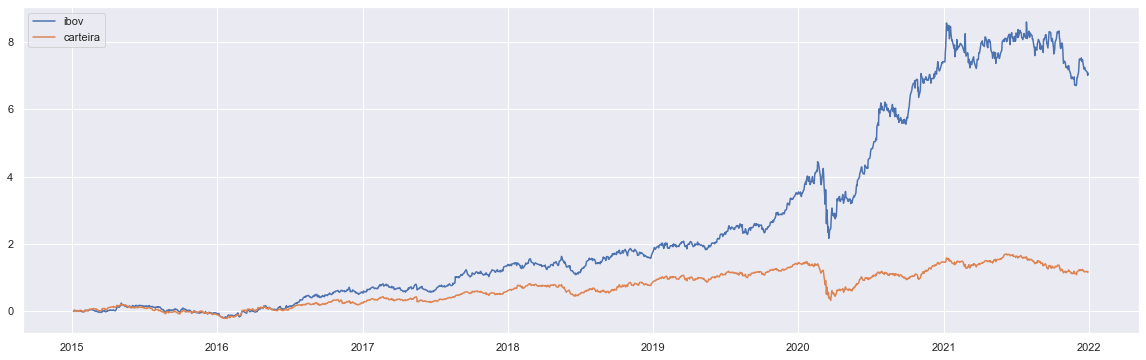

In [36]:
R = np.dot(df[tickers].pct_change(), w)
dfcomp = (pd.DataFrame(R, columns = ['R'],index = df.index).join(df['ibov'].pct_change())+1).cumprod() - 1
dfcomp.head()
plt.figure(figsize=(20, 6))
plt.plot(dfcomp)
plt.legend(['ibov','carteira'])

## Backtesting

### Simplificada

In [37]:
df.head()

,PETR3,VALE3,WEGE3,ELET3,ibov
Date,,,,,
2015-01-02,8.91,15.01,5.30,5.66,48512.0
2015-01-05,8.19,14.79,5.27,5.55,47517.0
2015-01-06,7.98,15.38,5.19,5.60,48001.0
2015-01-07,8.37,15.94,5.18,5.80,49463.0
2015-01-08,8.93,16.11,5.25,5.69,49943.0


In [38]:
def BacktestingSimples(data):
    returns = []
    data_mensal = data.resample('BM').pad().pct_change()
    for i in range(12,len(data_mensal.index)-1):
        df_mensal = data[data_mensal.index[i-12]:data_mensal.index[i]]
        wallets_mensal = generate_wallets(df_mensal)
        w_mensal = best_portfolio(wallets_mensal)
        returns.append(data_mensal[data_mensal.index[i+1]:data_mensal.index[i+1]].dot(w_mensal).values[0])
    returns = pd.DataFrame(returns, index = data_mensal.index[13:],columns = ['Rt'])
    return returns

In [39]:
bts = BacktestingSimples(df[tickers])
bts['Rtcum'] = (bts['Rt']+1).cumprod() - 1
bts.head()

,Rt,Rtcum
Date,,
2016-02-29,-0.028093,-0.028093
2016-03-31,0.159853,0.127269
2016-04-29,0.200420,0.353196
2016-05-31,-0.011406,0.337762
2016-06-30,0.565695,1.094527


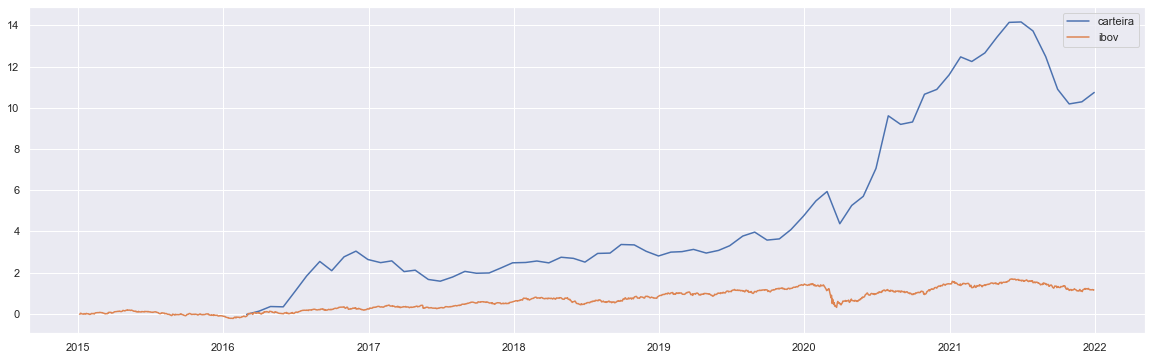

In [40]:
plt.figure(figsize=(20, 6))
plt.plot(bts['Rtcum'])
plt.plot(((df['ibov'].pct_change()+1).cumprod() - 1))
plt.legend(['carteira', 'ibov'])

### Completa

In [41]:
## Minha ideia é fazer pela quantidade, pq teoricamente, a quantidade de ações só muda no inicio do mês.
## Desse modo, após calcular o peso. Divide-se pelo preço das ações e essa será a quantidade proporcional, que será constante durante todo mês.
def BacktestingCompleta(data):
    returns = []
    data_mensal = data.resample('BM').pad()
    datacopy = data.copy()
    datacopy['patrimonio'] = np.nan
    patrimonio = 1
    for i in range(12,len(data_mensal.index)-1):
        df_mark = data[data_mensal.index[i-12]:data_mensal.index[i]]
        wallets_mensal = generate_wallets(df_mark)
        w_mensal = best_portfolio(wallets_mensal)
        df_mensal = data[data_mensal.index[i]:data_mensal.index[i+1]]
        quantidade = patrimonio*w_mensal/data_mensal[data_mensal.index[i]:data_mensal.index[i]].values.tolist()
        datacopy.loc[data_mensal.index[i]:data_mensal.index[i+1], 'q' + data.columns ] = quantidade
        patrimonio = 0
        for k in range(len(data.columns)):
            patrimonio += df_mensal.iloc[len(df_mensal) - 1][data.columns[k]]*quantidade[0][k]
    datacopy.fillna(method='ffill',inplace = True)
    for i in range(len(datacopy)):
        patrimonio = 0
        for k in data.columns:
            patrimonio += datacopy.iloc[i][k]*datacopy.iloc[i]['q'+k]
        datacopy.iloc[i]['patrimonio'] = patrimonio
    return datacopy

In [42]:
btc = BacktestingCompleta(df[tickers])

In [43]:
btc.tail(50)

,PETR3,VALE3,WEGE3,ELET3,patrimonio,qPETR3,qVALE3,qWEGE3,qELET3
Date,,,,,,,,,
2021-10-19,28.88,79.00,39.35,39.15,12.628736,0.068442,0.094082,0.052135,0.029837
2021-10-20,29.37,76.41,40.11,37.84,12.419136,0.068442,0.094082,0.052135,0.029837
2021-10-21,28.46,75.16,39.35,36.24,12.151889,0.068442,0.094082,0.052135,0.029837
2021-10-22,27.90,76.08,38.89,35.47,12.153161,0.068442,0.094082,0.052135,0.029837
2021-10-25,29.61,77.00,39.55,36.64,12.426070,0.068442,0.094082,0.052135,0.029837
2021-10-26,29.27,76.18,39.66,36.18,12.317662,0.068442,0.094082,0.052135,0.029837
2021-10-27,29.31,74.45,39.20,36.37,12.139324,0.068442,0.094082,0.052135,0.029837
2021-10-28,29.59,73.70,37.83,35.94,12.003671,0.068442,0.094082,0.052135,0.029837
2021-10-29,27.67,71.61,37.00,33.83,11.569403,0.151210,0.099070,0.006556,0.001432


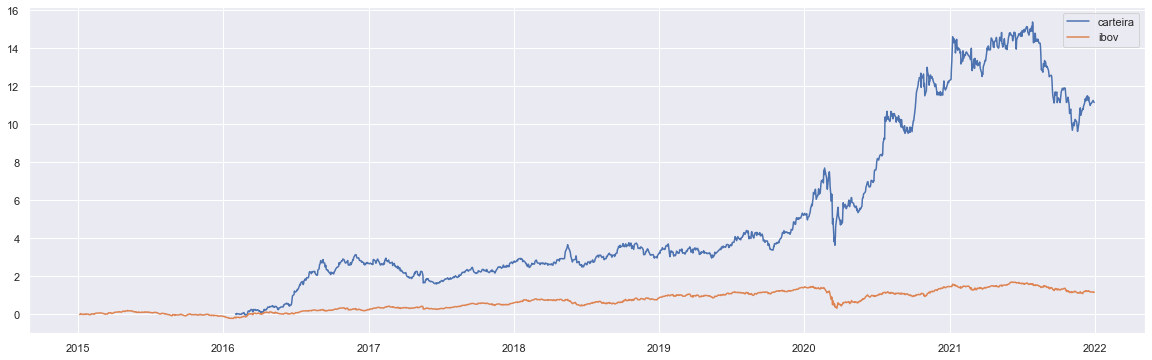

In [44]:
plt.figure(figsize=(20, 6))
plt.plot((btc['patrimonio'].pct_change()+1).cumprod() - 1)
plt.plot(((df['ibov'].pct_change()+1).cumprod() - 1))
plt.legend(['carteira', 'ibov'])